# Лабораторная работа №4. Визуализация данных с использованием библиотек Python. Управление компоновкой диаграмм.

## Выполнил: Лапатин Данила, гр. 932001

## Цель работы: изучить инструменты визуализации многомерных данных, научитьсявыбирать тип визуализации. Научиться управлять компоновкой диаграмм.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
df = pd.read_csv("HousePrices.csv", index_col=0)
df

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [2]:
df_price = df.copy()
df_price = df_price[df_price.columns[~df_price.columns.isin(['nr'])]]
df_price = df_price[(df_price['price'] > 0)]
df_price.shape

(546, 12)

1) Постройте визуализацию ваших данных, используя facet-сетка.

**Facet-сетка**: классическая сетка для размещения графиков, построенных с помощью функций из наборов для визуализации отношений в данных (scatterplot(), lineplot()), визуализации категориальных данных (stripplot(), boxplot() и т.д.) и визуализации модели линейной регрессии (regplot(), residplot())

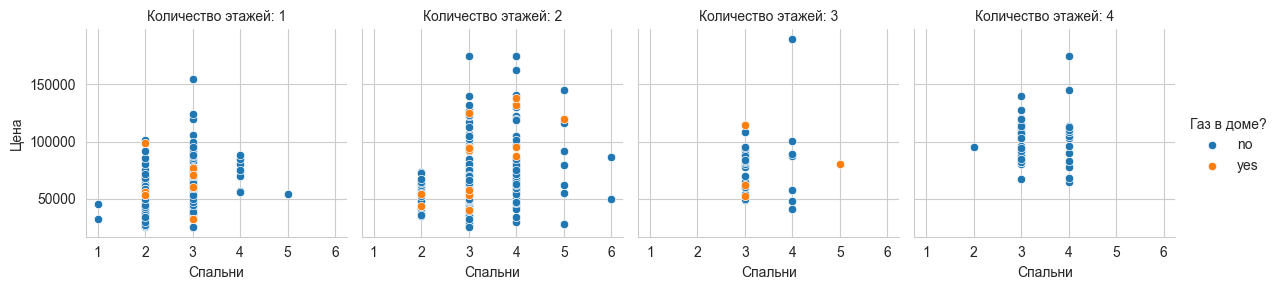

In [11]:
g = sns.FacetGrid(df_price, col="stories", hue="gasheat",  col_wrap= 4)
g.map_dataframe(sns.scatterplot, x="bedrooms", y="price")

g.set_axis_labels("Спальни", "Цена")
g.set_titles(col_template="Количество этажей: {col_name}")
g.add_legend(title="Газ в доме?")

**Вывод**: С данных графиков заметно, что дома, в которых 3 спальни, стоят чуть дороже остальных вне зависимости от количества этажей. Наличие газа в доме не влияет коренным образом на среднюю цену

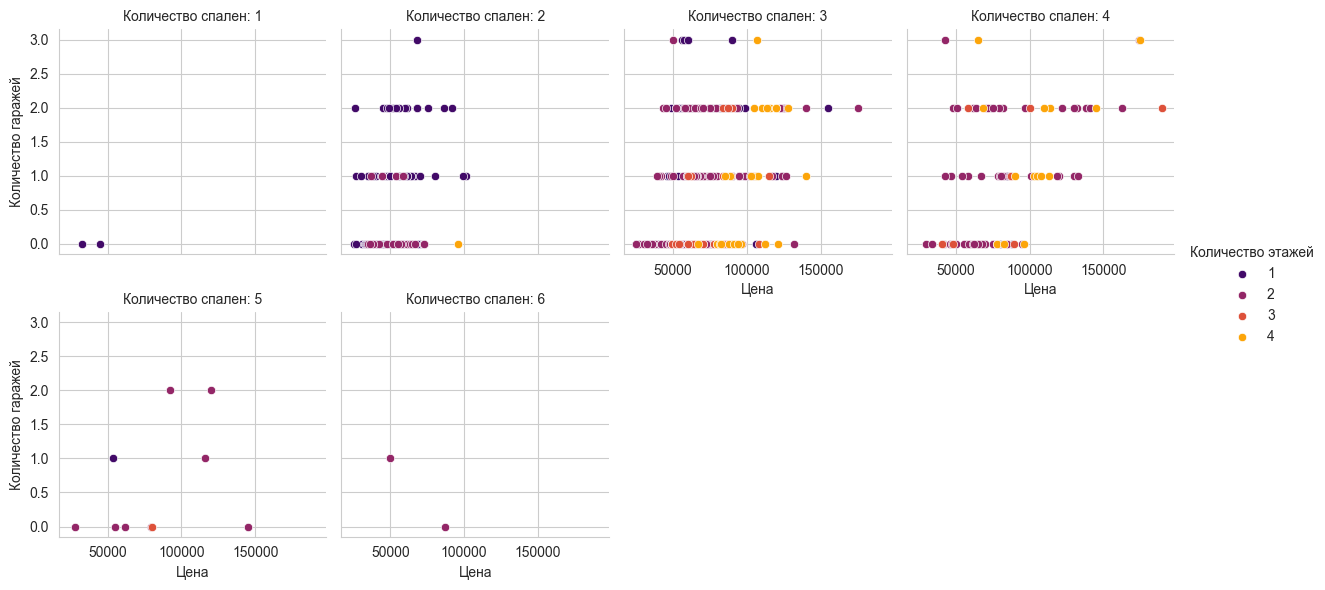

In [17]:
g = sns.FacetGrid(df_price, col="bedrooms", hue="stories", palette='inferno', col_wrap= 4)
g.map_dataframe(sns.scatterplot, x="price", y="garage")
g.set_axis_labels("Цена", "Количество гаражей")
g.set_titles(col_template="Количество спален: {col_name}")
g.add_legend(title="Количество этажей")

**Вывод**: В большинстве случаев в домах по три спальни. Чаще всего в домах либо нет гаража, либо гаражей 1-2. Больше стоят дома, в которых 2 и 4 этажа

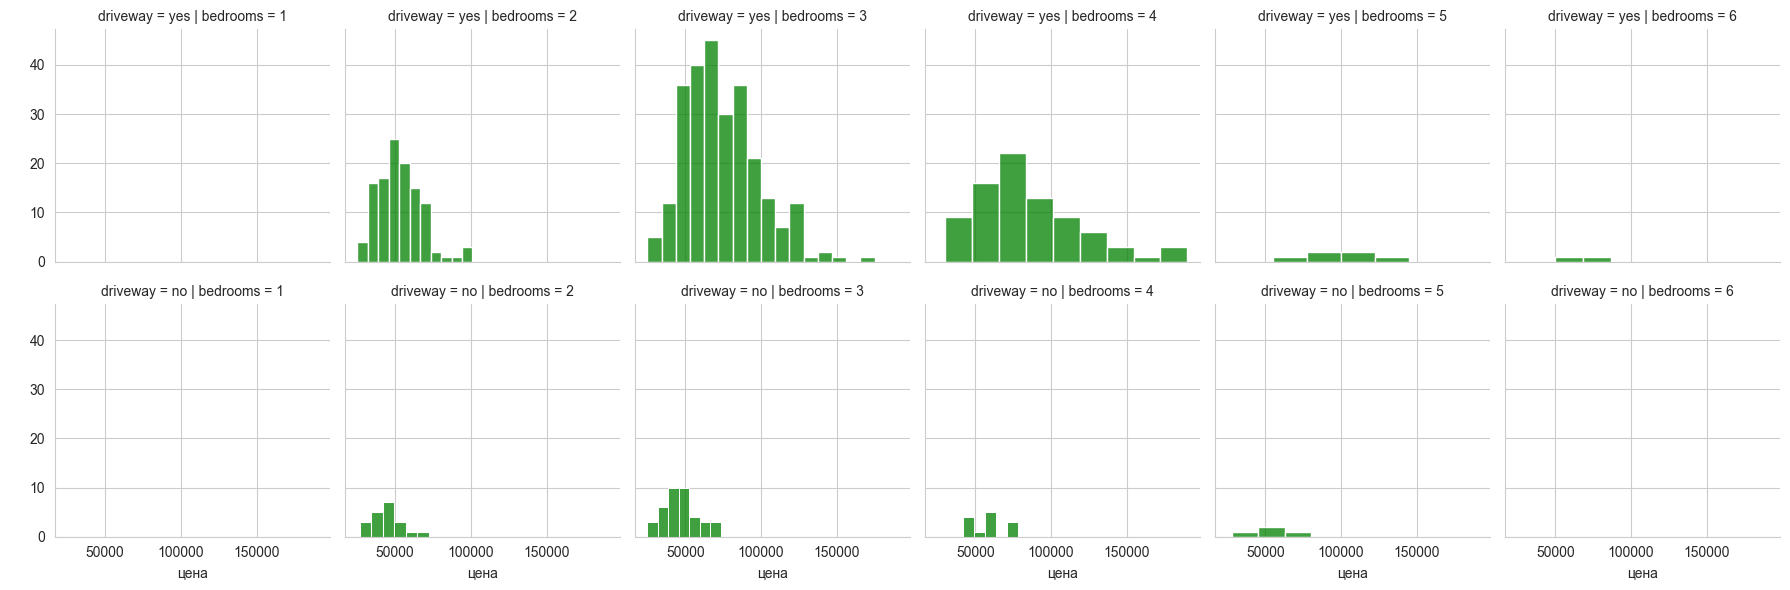

In [19]:
g = sns.FacetGrid(df_price, col="bedrooms",  row="driveway")
g.map_dataframe(sns.histplot, x="price", color="g")
g.set_axis_labels(x_var="цена", y_var=' ')

Диаграмма показывает все возможные сочетания количества спален и наличия подъездной дороги, а также показывает цену и количество домов в той или иной категории. Глядя на диаграмму можно сделать выводы, что дома с подъездной дорогой стоят больше, в большинстве домов от 2-х до 4-х спален и больше всего домов с тремя спальнями. Больше всего домов стоят от 50000 до 1000000 долларов. Практически нет домов, в которых 1 спальня, 6 спален.

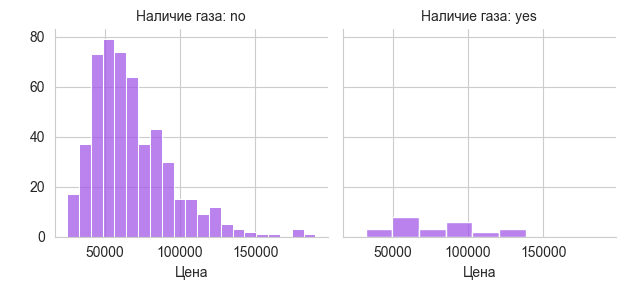

In [20]:
g = sns.FacetGrid(df_price, col="gasheat", col_wrap=5)
g.map_dataframe(sns.histplot, "price", color="#a358e8")
g.set_axis_labels(x_var="Цена", y_var=' ')
g.set_titles(col_template="Наличие газа: {col_name}");

**Вывод**: количество домов без газа гораздо выше, чем с газом, а стоят они примерно столько же

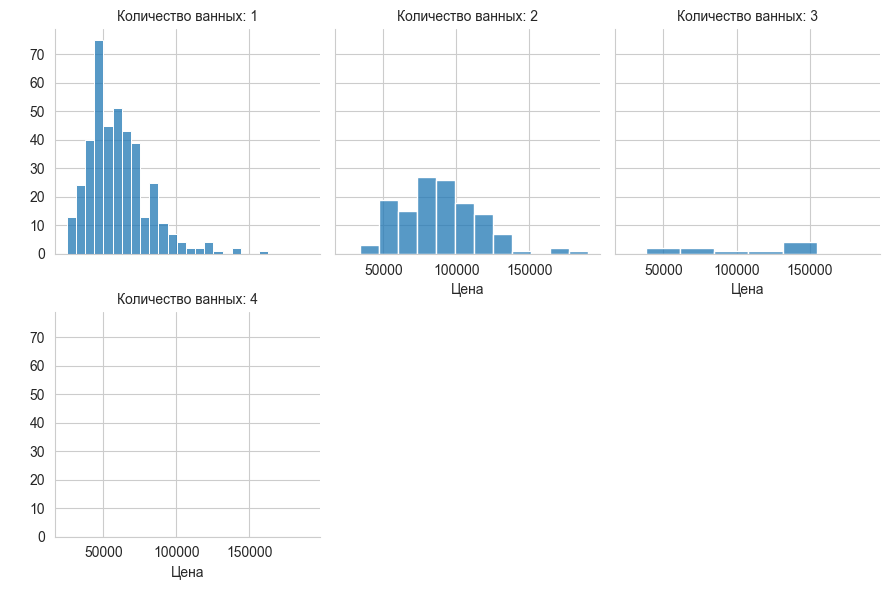

In [22]:
g = sns.FacetGrid(df_price, col="bathrooms", palette='inferno', col_wrap=3)
g.map_dataframe(sns.histplot, "price")
g.set_axis_labels(x_var="Цена", y_var=' ')
g.set_titles(col_template="Количество ванных: {col_name}");

**Вывод**: больше всего домов с одной-двумя ванными, дома с тремя ванными стоят больше всего. По 4 ванных комнаты в доме практически не бывает

2) Постройте визуализацию ваших данных, используя pair-сетка.

Pair-сетка - сетка для представления попарных соотношений в данных. Класс PairPlot формирует сетку для построения диаграмм попарного сравнения выбранных признаков из переданного набора данных.

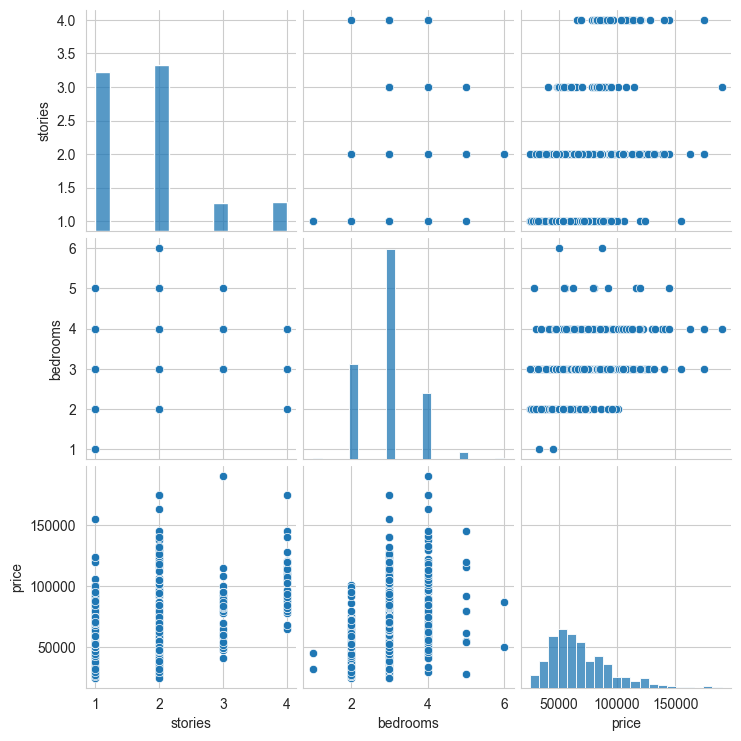

In [23]:
df_mod = df_price[["stories", "bedrooms", "price"]]
sns.pairplot(df_mod)

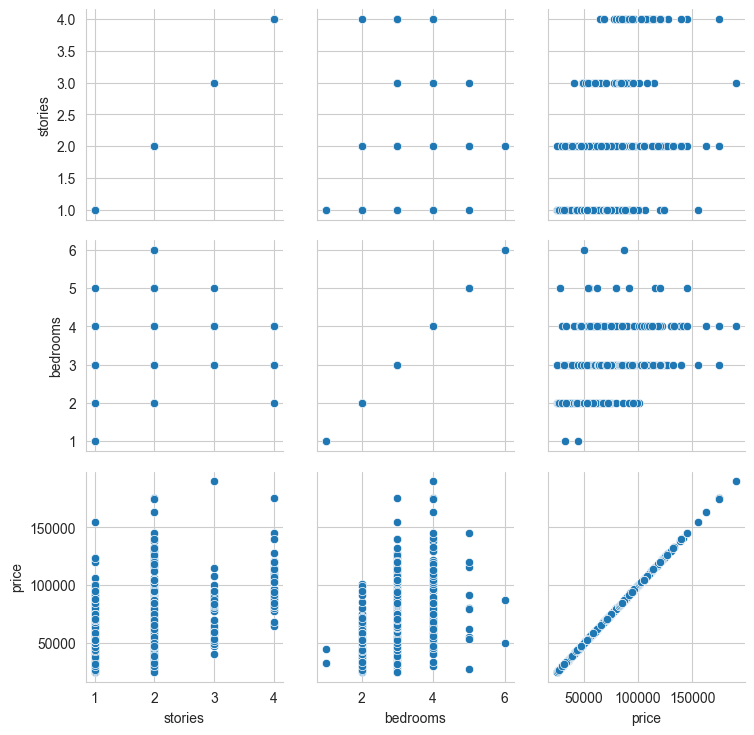

In [27]:
g = sns.PairGrid(df_mod)
g.map(sns.scatterplot)

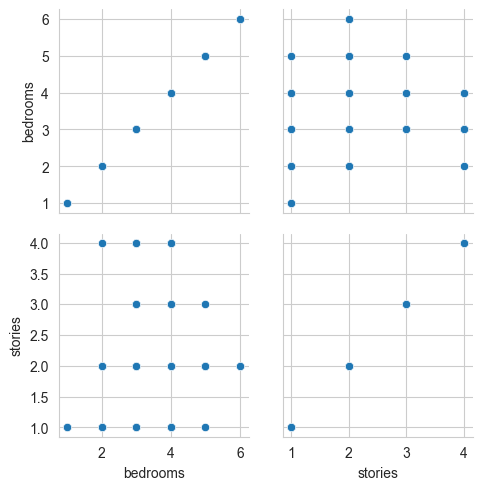

In [26]:
g = sns.PairGrid(df_price, vars=["bedrooms", "stories"])
g.map(sns.scatterplot)

**Вывод**: Чем больше этажей, тем больше спален

3) Постройте визуализацию ваших данных, используя joint-сетка.¶

Joint-сетка отображает диаграмму для двух переменных с дополнительной визуализацией их распределений.

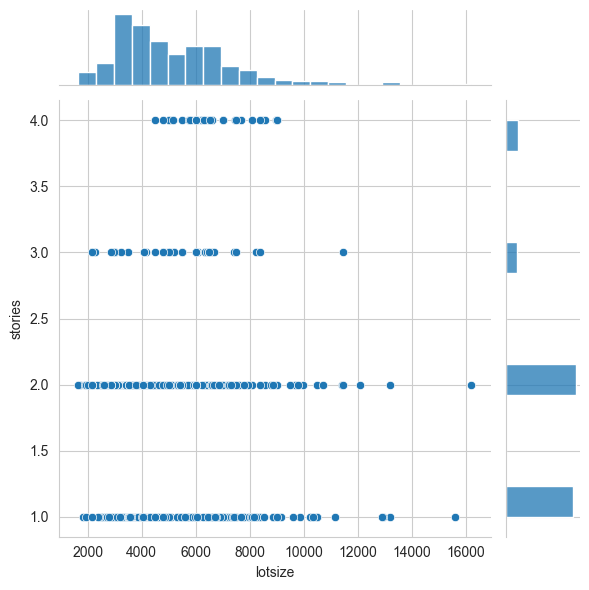

In [29]:
g = sns.JointGrid(data=df_price, x="lotsize", y="stories")
g.plot(sns.scatterplot, sns.histplot);

**Вывод**: Чаще всего в домах 2 этажа, чуть реже-1 этаж.Чаще всего площадь домов составляет от 2000 до 4000 квадратных футов

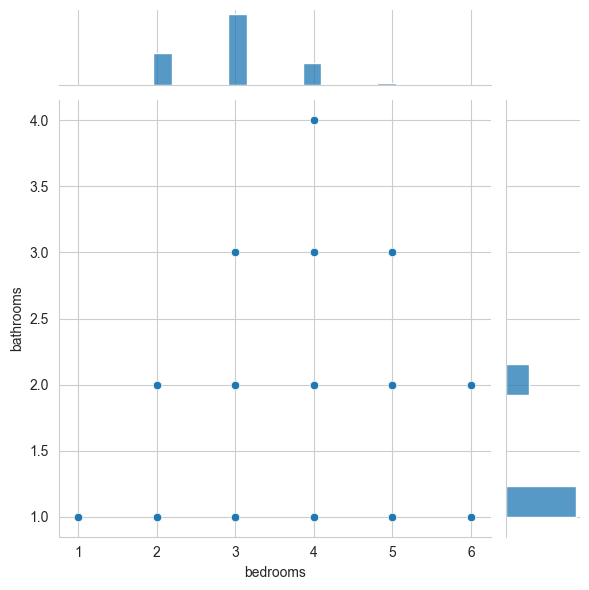

In [32]:
g = sns.JointGrid(data=df_price, x="bedrooms", y="bathrooms")
g.plot(sns.scatterplot, sns.histplot);

**Вывод**: чаще всего в доме одна ванная, 3 спальни

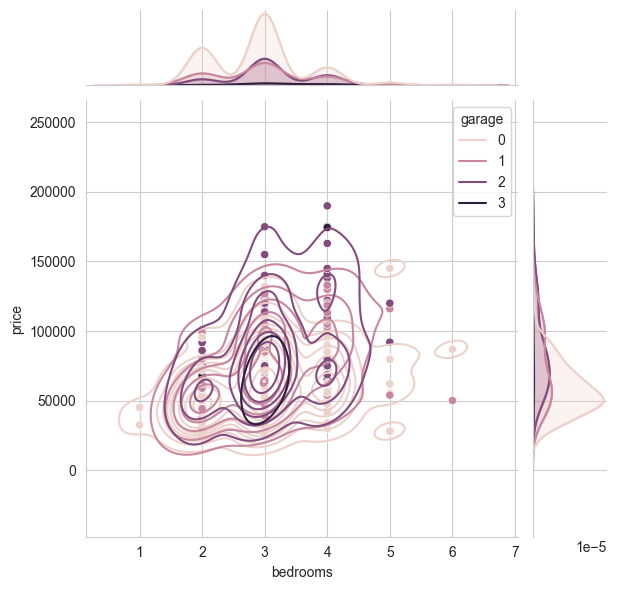

In [33]:
ax = sns.jointplot(x='bedrooms', y='price', hue="garage",data=df_price)
ax = ax.plot_joint(sns.kdeplot)
ax = ax.plot_marginals(sns.kdeplot)

**Вывод**: Среднее значение Цены 50000 долларов, количество спален  чаще либо равно 2, либо равно 3, в домах нет гаража.

В ходе лабораторной работы №4 были рассмотрены Facet, Pair и Joint сетки.